# INTRODUCTION

**What is customer churn?**

Customer churn refers to the natural business cycle of losing and acquiring customers. Every company — no matter the quality of its products or customer service — experiences churn. Generally speaking, the less churn you have, the more customers you keep.



---


**Why is customer churn important?**

Understanding your customer churn is essential to evaluating the effectiveness of your marketing efforts and the overall satisfaction of your customers. It’s also easier and cheaper to keep customers you already have versus acquiring new ones. Due to the popularity of subscription business models, it’s critical for many businesses to understand where, how, and why their customers may be churning.


---


In this notebook i will through various machine learning techniques such as Random Forest and KNN to compare which model is best for predicting customer 
churn

# DATASET INFORMATION

The data used in this repository is an Credit Card Customer dataset available at Kaggle through this https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&sortBy=voteCount


The data column and information :

* CLIENTNUM: Client number. Unique identifier for the customer holding the account

* Customer Age: Demographic variable - Customer's Age in Years

* Gender: Demographic variable - M=Male, F=Female

* Dependent count: Demographic variable - Number of dependents

* Education Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

* Marital Status: Demographic variable - Married, Single, Divorced, Unknown

* Income Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

* Card Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months on book: Period of relationship with bank

* Total Relationship Count: Total no. of products held by the customer

* Months Inactive 12 mon: No. of months inactive in the last 12 months

* Contacts Count 12 mon: No. of Contacts in the last 12 months

* Credit Limit: Credit Limit on the Credit Card

* Total Revolving Bal: Total Revolving Balance on the Credit Card

* Avg Open To Buy: Open to Buy Credit Line (Average of last 12 months)

* Total Amt Chng Q4 Q1: Change in Transaction Amount (Q4 over Q1)

* Total Trans Amt: Total Transaction Amount (Last 12 months)

* Total Trans Ct: Total Transaction Count (Last 12 months)

* Total Ct Chng Q4 Q1: Change in Transaction Count (Q4 over Q1)

* Avg Utilization_Ratio: Average Card Utilization Ratio

# IMPORT LIBARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

# IMPORT DATA

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
         'CLIENTNUM', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Dependent_count',] ,axis=1 , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

**The dataset contains 17 columns and 10127 entries. The target column is a `Attrition_Flag`**

# DATA CLEANING

## MISSING VALUE

In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

**There is no missing value in dataset**

## Dupclicated Data

In [8]:
df.duplicated().sum()

0

**There is no duplicated data in dataset**

# STANDARD EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [10]:
numericals = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
categoricals = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [11]:
df[numericals].describe()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


**Interpretation :**



*   Minimum and maximum values for all columns seemed reasonable
*   `Customer_Age`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Ct`, `Avg_Utilization_Ratio` has skewed distribution (mean > median)




In [12]:
df[categoricals].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [13]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Attrition_Flag column
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Value counts of Gender column
F    5358
M    4769
Name: Gender, dtype: int64 

Value counts of Education_Level column
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Value counts of Marital_Status column
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Value counts of Income_Category column
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Value counts of Card_Category column
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



# UNIVARIATE ANALYSIS

## BOXPLOT

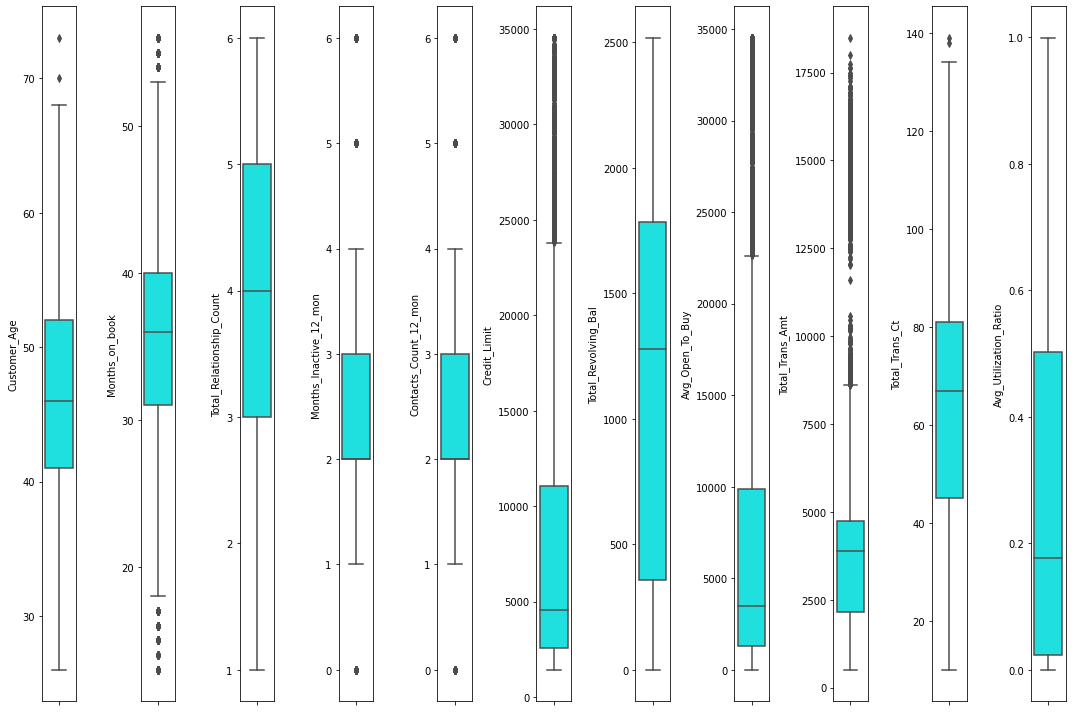

In [14]:
plt.figure(figsize=(15,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

**Interpretation :**

There are many outlier for some features

*   `Credit_Limit`
*   `Avg_Open_To_Buy`
*   `Total_Trans_Amount`

`Customer_Age`, `Months_on_book`, `Months_Inactive_12_mon`                                                  `Contacts_Count_12_mon` have outliers but still normal. no need to drop it


### TREATMENT FOR OUTLIERS

In [15]:
df["Credit_Limit"] = df["Credit_Limit"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Credit_Limit'].skew())
print(df['Credit_Limit'].skew())

0.4570806899151332
0.4570806899151332


In [16]:
df["Total_Trans_Amt"] = df["Total_Trans_Amt"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Total_Trans_Amt'].skew())
print(df['Total_Trans_Amt'].skew())

0.2622104617789093
0.2622104617789093


In [17]:
df["Avg_Open_To_Buy"] = df["Avg_Open_To_Buy"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Avg_Open_To_Buy'].skew())
print(df['Avg_Open_To_Buy'].skew())

-0.10013152714089622
-0.10013152714089622


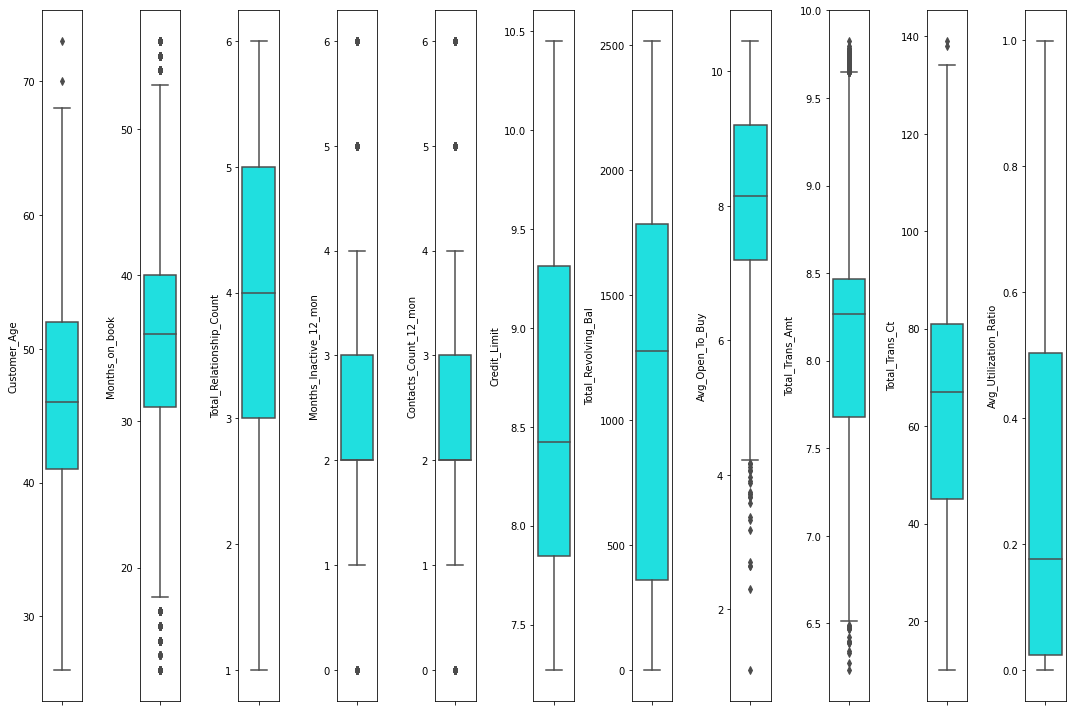

In [18]:
plt.figure(figsize=(15,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

## VIF

In [19]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df.drop(columns='Attrition_Flag')
y = df[['Attrition_Flag']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train[numericals])

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Customer_Age,2.697315
2,Months_on_book,2.701003
3,Total_Relationship_Count,1.106288
4,Months_Inactive_12_mon,1.012022
5,Contacts_Count_12_mon,1.033422
6,Credit_Limit,24.283942
7,Total_Revolving_Bal,3.161376
8,Avg_Open_To_Buy,49.608277
9,Total_Trans_Amt,5.960724
10,Total_Trans_Ct,5.816538


**Interpretation :**

There are some feature that have vif score > 4


*   `Credit_Limit`
*   `Avg_Open_To_Buy`
*   `Total_Trans_Amt`
*   `Total_Trans_Ct`
*   `Avg_Utilization_Ratio`





## Bivariate Analysis

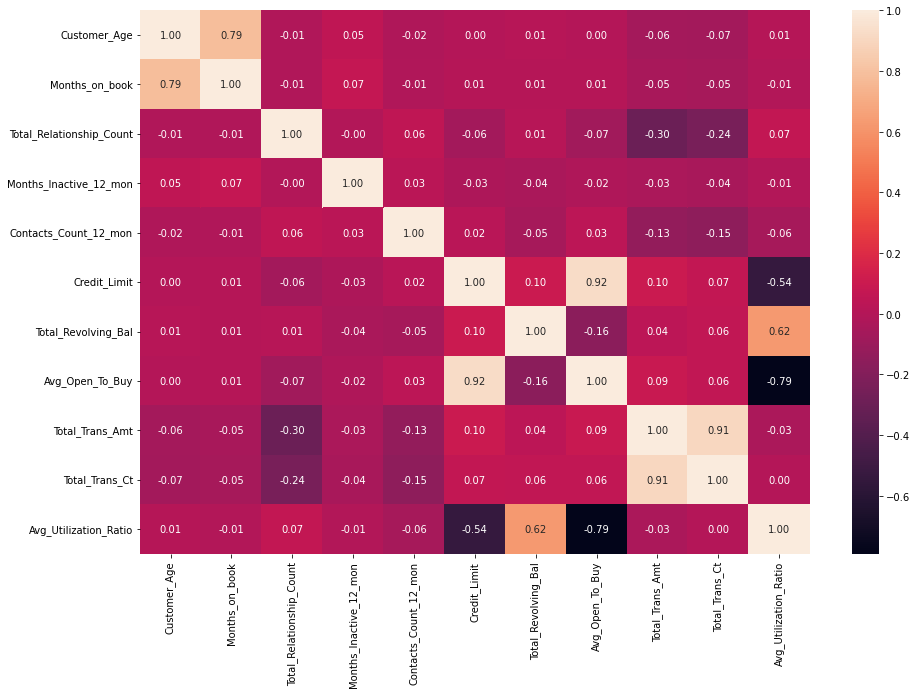

In [21]:
plt.figure(figsize=(15,10))

correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Interpretation :**

Variables inside cream rectangle are highly correlated each other

*   `Months_on_books` have a high correlation score 0.79 with `Customer_Age`
*   `Credit_Limit` have a high correlation score 0.92 with `Avg_Open_To_Buy`
*   `Total_Trans_Amt` have a high correlation score 0.92 with `Total_Trans_Ct`

This means they contain redundant information. We can choose only 1 of
them to modelling process.



---


**According VIF Score and Correlation Heatmap. I will drop some feature below here**


In [22]:
df.drop(['Avg_Open_To_Buy', 'Months_on_book', 
         'Avg_Utilization_Ratio', 'Total_Trans_Ct'] ,axis=1 , inplace = True)

# Data Visualization

In [23]:
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

## GENDER

In [24]:
ex.pie(df,names='Gender',title='Propotion Of Gender',hole=0.33)

In [25]:
fig = ex.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.1)

fig.show()

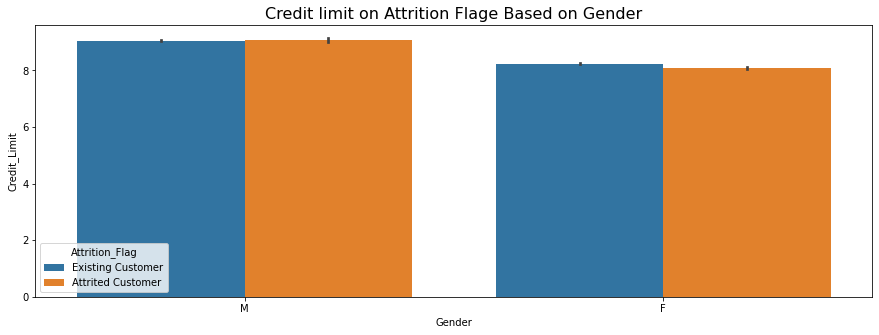

In [26]:
plt.figure(figsize=(15,5))

sns.barplot(x="Gender", y="Credit_Limit", hue="Attrition_Flag", data=df)
plt.title('Credit limit on Attrition Flage Based on Gender', fontsize = 16)

plt.show()

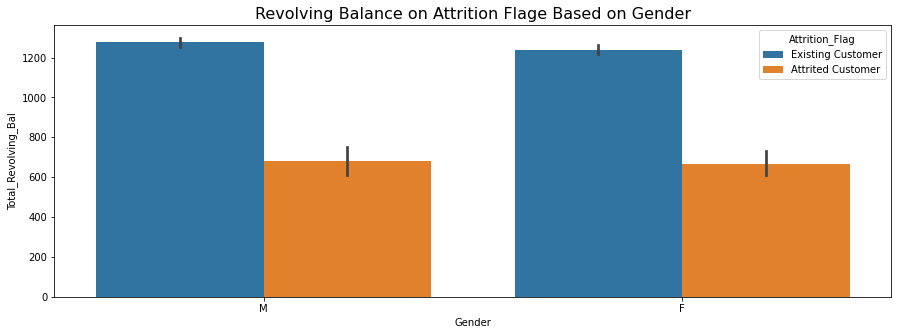

In [27]:
plt.figure(figsize=(15,5))

sns.barplot(x="Gender", y="Total_Revolving_Bal", hue="Attrition_Flag", data=df)
plt.title('Revolving Balance on Attrition Flage Based on Gender', fontsize = 16)

plt.show()

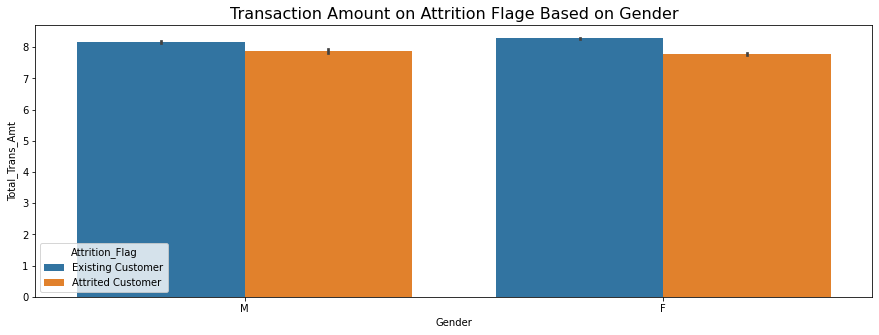

In [28]:
plt.figure(figsize=(15,5))

sns.barplot(x="Gender", y="Total_Trans_Amt", hue="Attrition_Flag", data=df)
plt.title('Transaction Amount on Attrition Flage Based on Gender', fontsize = 16)

plt.show()

## EDUCATION 


In [29]:
ex.pie(df,names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

In [30]:
fig = ex.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.1)

fig.show()

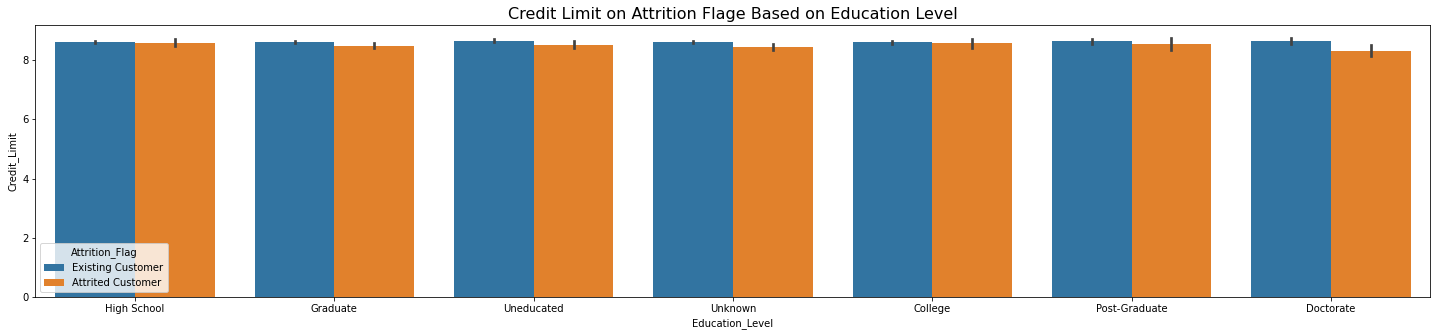

In [31]:
plt.figure(figsize=(25,5))

sns.barplot(x="Education_Level", y="Credit_Limit", hue="Attrition_Flag", data=df)
plt.title('Credit Limit on Attrition Flage Based on Education Level', fontsize = 16)

plt.show()

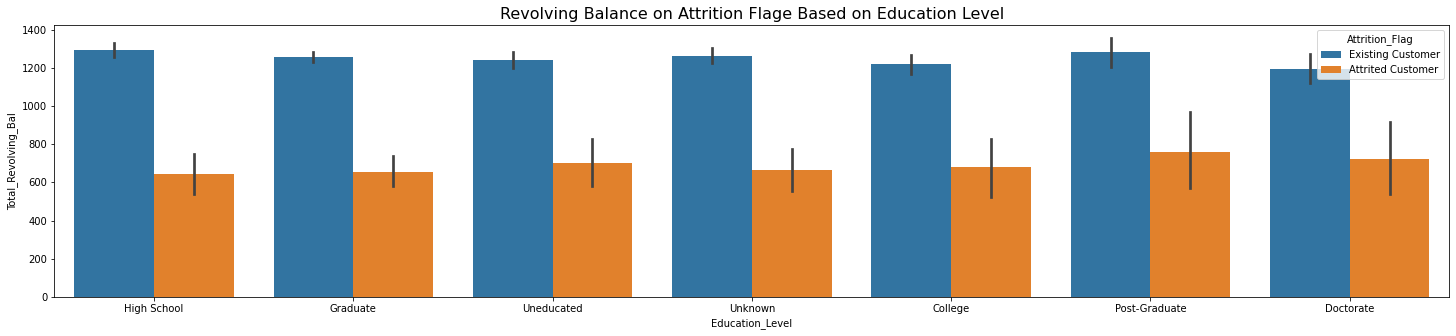

In [32]:
plt.figure(figsize=(25,5))

sns.barplot(x="Education_Level", y="Total_Revolving_Bal", hue="Attrition_Flag", data=df)
plt.title('Revolving Balance on Attrition Flage Based on Education Level', fontsize = 16)

plt.show()

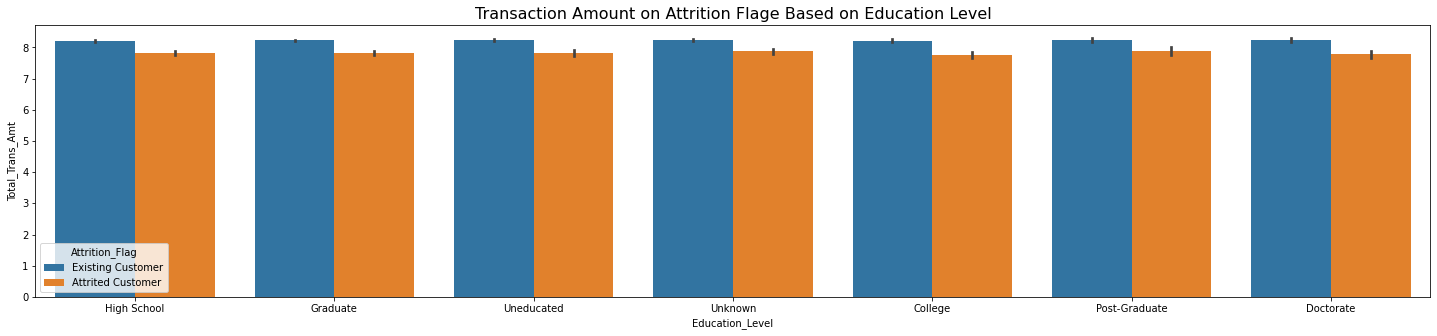

In [33]:
plt.figure(figsize=(25,5))

sns.barplot(x="Education_Level", y="Total_Trans_Amt", hue="Attrition_Flag", data=df)
plt.title('Transaction Amount on Attrition Flage Based on Education Level', fontsize = 16)

plt.show()

## CARD CATEGORIES

In [34]:
ex.pie(df,names='Card_Category',title='Propotion Of Different Card Categories',hole=0.33)

In [35]:
fig = ex.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.1)

fig.show()

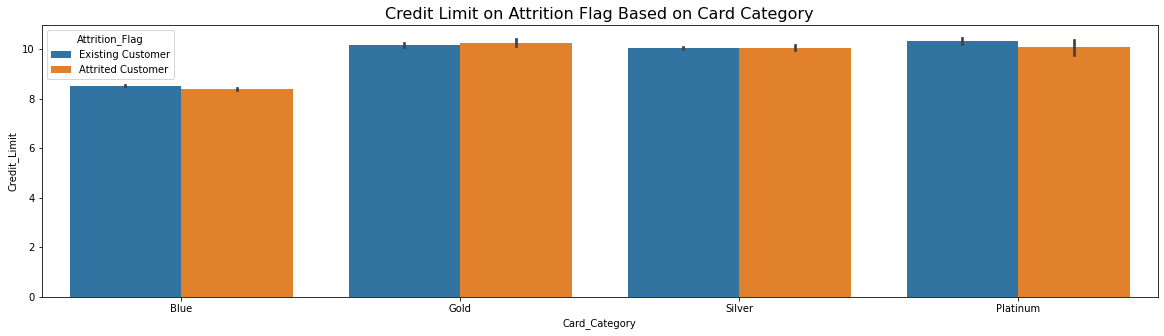

In [36]:
plt.figure(figsize=(20,5))

sns.barplot(x="Card_Category", y="Credit_Limit", hue="Attrition_Flag", data=df)
plt.title('Credit Limit on Attrition Flag Based on Card Category', fontsize = 16)

plt.show()

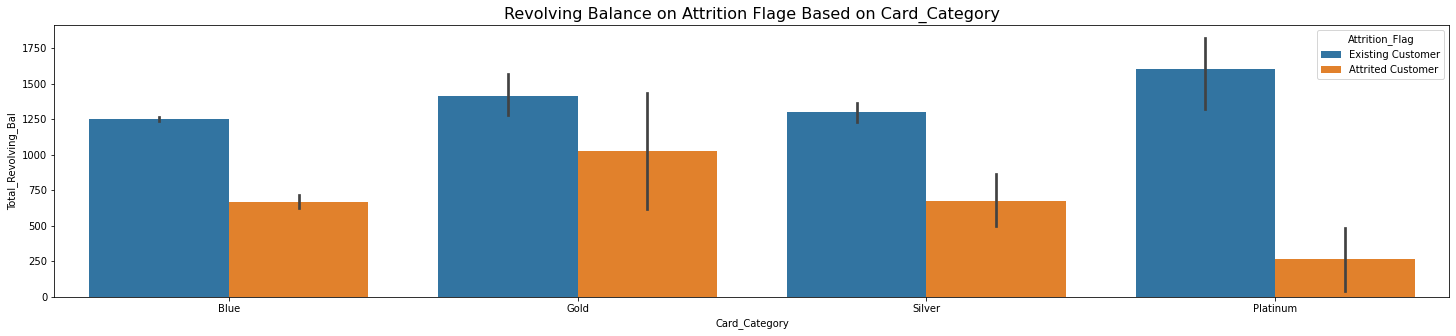

In [37]:
plt.figure(figsize=(25,5))

sns.barplot(x="Card_Category", y="Total_Revolving_Bal", hue="Attrition_Flag", data=df)
plt.title('Revolving Balance on Attrition Flage Based on Card_Category', fontsize = 16)

plt.show()

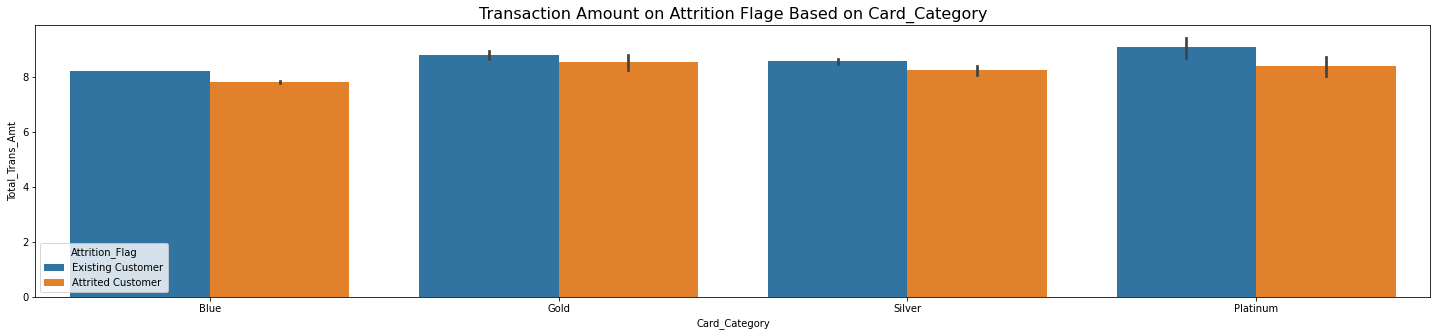

In [38]:
plt.figure(figsize=(25,5))

sns.barplot(x="Card_Category", y="Total_Trans_Amt", hue="Attrition_Flag", data=df)
plt.title('Transaction Amount on Attrition Flage Based on Card_Category', fontsize = 16)

plt.show()

## MARTIAL STATUS

In [39]:
ex.pie(df,names='Marital_Status',title='Propotion Of Different Marriage Statuses',hole=0.33)

In [40]:
fig = ex.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.1)

fig.show()

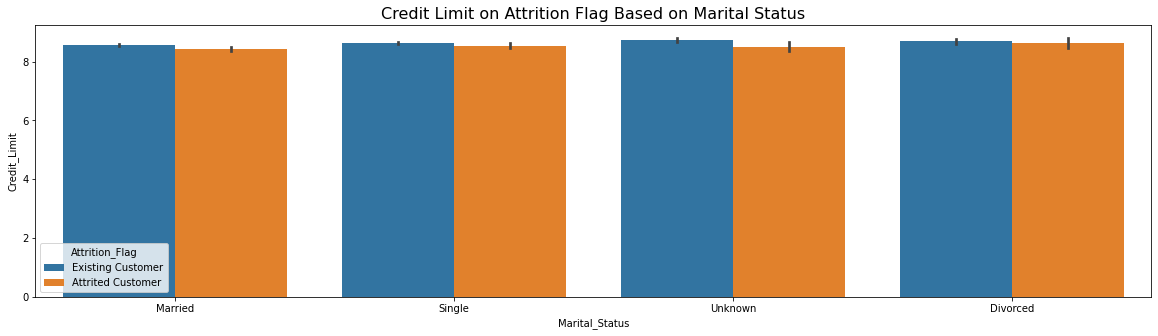

In [41]:
plt.figure(figsize=(20,5))

sns.barplot(x="Marital_Status", y="Credit_Limit", hue="Attrition_Flag", data=df)
plt.title('Credit Limit on Attrition Flag Based on Marital Status', fontsize = 16)

plt.show()

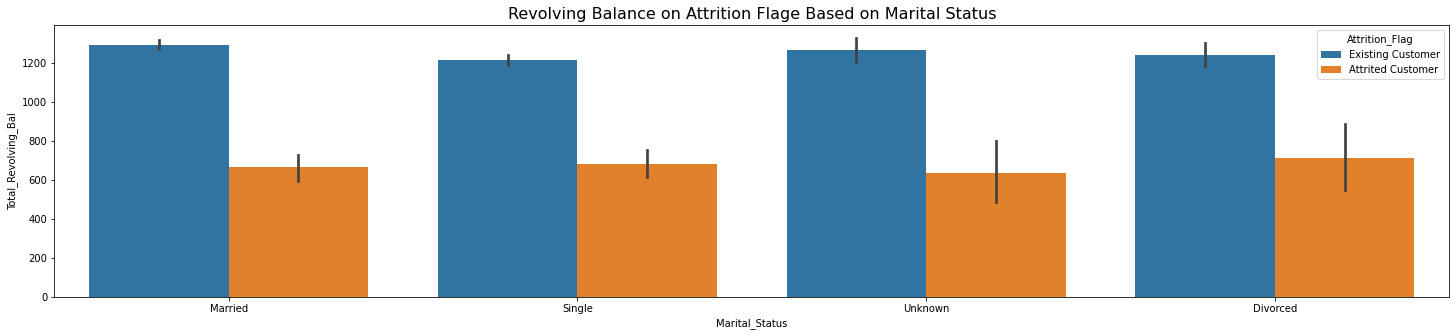

In [42]:
plt.figure(figsize=(25,5))

sns.barplot(x="Marital_Status", y="Total_Revolving_Bal", hue="Attrition_Flag", data=df)
plt.title('Revolving Balance on Attrition Flage Based on Marital Status', fontsize = 16)

plt.show()

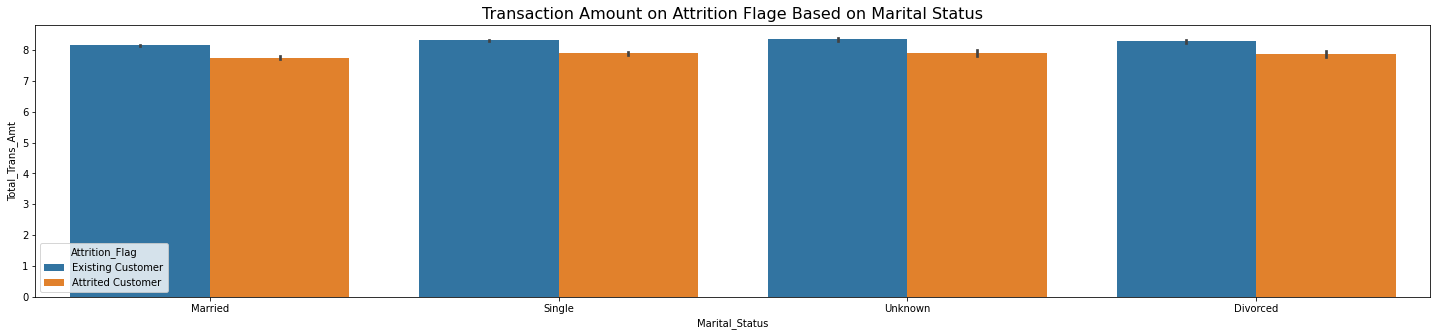

In [43]:
plt.figure(figsize=(25,5))

sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue="Attrition_Flag", data=df)
plt.title('Transaction Amount on Attrition Flage Based on Marital Status', fontsize = 16)

plt.show()

## INCOME CATEGORY

In [44]:
ex.pie(df,names='Income_Category',title='Propotion Of Different Income Levels',hole=0.33)

In [45]:
fig = ex.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.1)

fig.show()

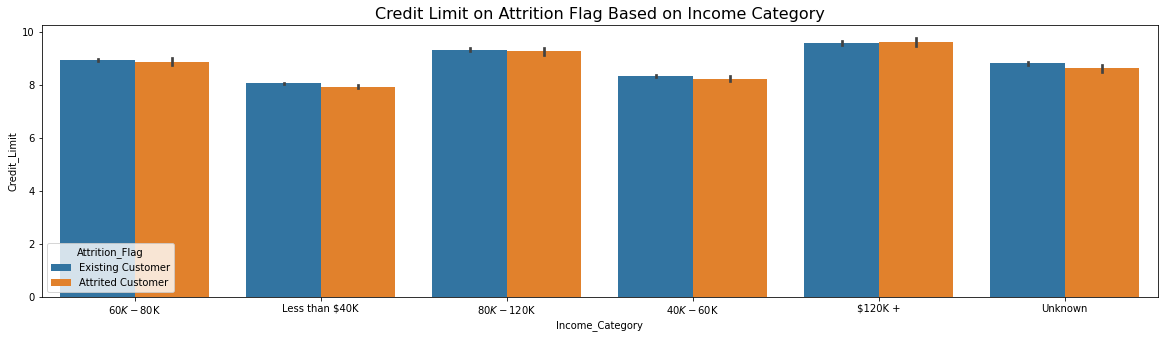

In [46]:
plt.figure(figsize=(20,5))

sns.barplot(x="Income_Category", y="Credit_Limit", hue="Attrition_Flag", data=df)
plt.title('Credit Limit on Attrition Flag Based on Income Category', fontsize = 16)

plt.show()

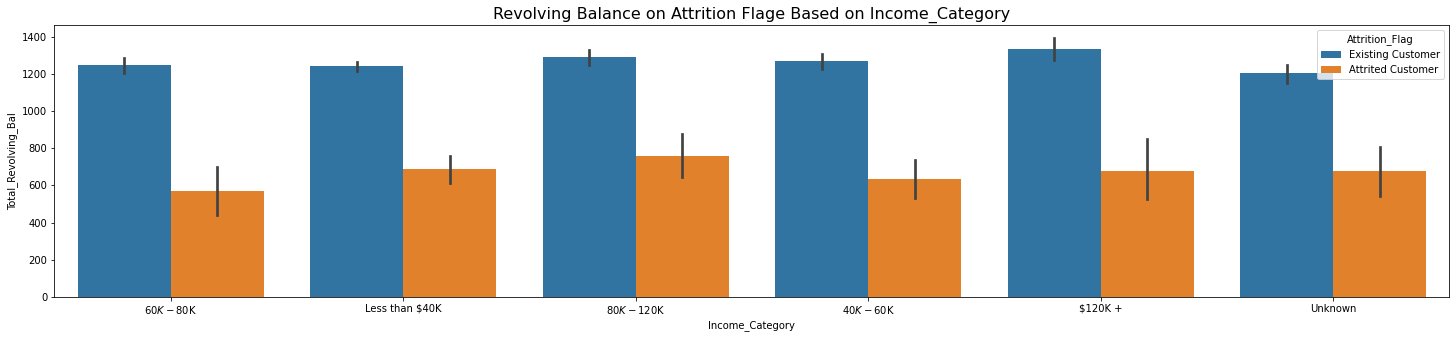

In [47]:
plt.figure(figsize=(25,5))

sns.barplot(x="Income_Category", y="Total_Revolving_Bal", hue="Attrition_Flag", data=df)
plt.title('Revolving Balance on Attrition Flage Based on Income_Category', fontsize = 16)

plt.show()

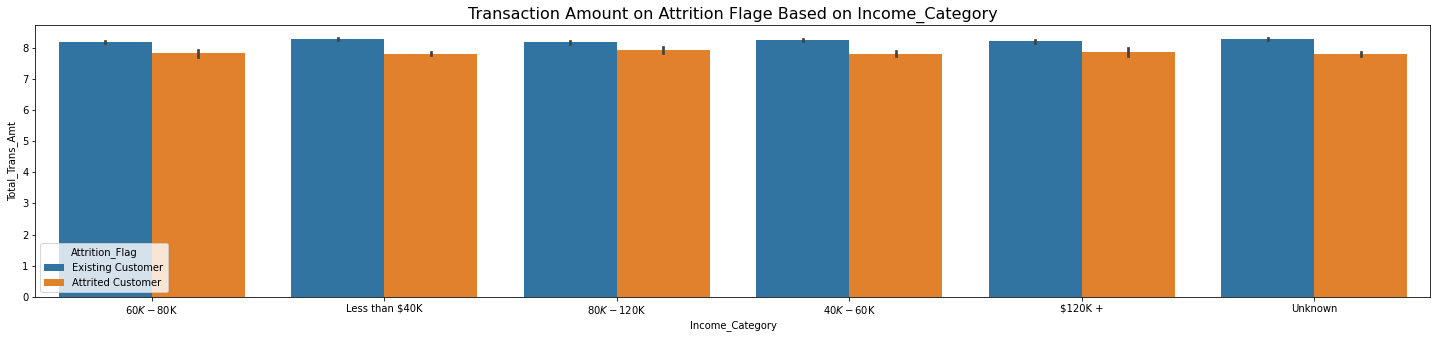

In [48]:
plt.figure(figsize=(25,5))

sns.barplot(x="Income_Category", y="Total_Trans_Amt", hue="Attrition_Flag", data=df)
plt.title('Transaction Amount on Attrition Flage Based on Income_Category', fontsize = 16)

plt.show()

## Interpretation

**Interpretation Data Visualization**



*   In Data visualization, Gender is divided into female and male. By percentage, female (52.9%) have higher percentage more than men (47.1%).And based on the histogram count, it is said that the female has a higher churn rate than the male. But when compared to the credit limit, transaction amount, and revolving balance. it is said that men (existing and churn) has the highest credit limit, female (existing customer) has the highest transaction amount and male (churn customer) has the highest transaction amount. In revolving balance, female has the highest revolving balance (existing and churn)


*   In Data visualization, Education Level Graduate is the highest percentage with (30.9%), Followed by High School (19.9%), Uknown (15%), and Uneducated (14.7%). And in histogram, it can be said that Graduate has a higher churn. But when compared to the credit limit transaction amount, and revolving balance. it is said that post-graduate has the highest credit limit, transaction amount, and revolving balance.


*   In Data visualization, Card Category Blue Card blue card is the most dominant card used by the customer with percentage score (93.2%). And of course on the histogram, blue card has the highest customer churn. But after compared to credit limit, transaction amount, and revolving balance. Platinum card (existing cust) and Gold card (Churn Cust) has the highest credit limit. Platinum card (existing cust) and Gold card (Churn Cust) has the highest transaction amount. and Platinum card (existing cust) and Gold card (Churn Cust) has the highest revolving balance


*   In Data visualization, Martial Status Married is the highest percentage with (46.3%), Followed by Single (38.9%), Uknown (7.4%), and Divorced (7.39%). And in histogram, it can be said that married has a higher churn. But when compared to the credit limit transaction amount, and revolving balance. it is said that divorce (Existing and Churn Cus) has the highest credit limit. in Revolving Balance, Married (existing) and divorce (churn) has the highest revolving balance. in Transaction amount, divorce (existing and churn) has the highest transaction amount.



*   In Data visualization, Income Category Less than $40K is the highest percentage with (35.2%).

followed by 40K- (17.7%), 80K- (15.2%), and 60K- (13.8%). And in histogram, it can be said thatLess than $40K has a higher churn. But when compared to the credit limit, 120k+ has the highest credit limit. 80K-120K has the highest transaction amount and revolving balance.







# Data Preprocessing


## One Hot Encoding

In [49]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,5,1,3,9.448648,777,7.042286
1,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,6,1,2,9.018695,864,7.163172
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,4,1,0,8.136811,0,7.542744
3,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,3,4,1,8.105609,2517,7.065613
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,8.458716,0,6.704414


In [50]:
df['Gender'] = df['Gender'].replace("F", 0).replace("M", 1)
df['Attrition_Flag'] = df['Attrition_Flag'].replace("Existing Customer", 0).replace("Attrited Customer", 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,0,45,1,High School,Married,$60K - $80K,Blue,5,1,3,9.448648,777,7.042286
1,0,49,0,Graduate,Single,Less than $40K,Blue,6,1,2,9.018695,864,7.163172
2,0,51,1,Graduate,Married,$80K - $120K,Blue,4,1,0,8.136811,0,7.542744
3,0,40,0,High School,Unknown,Less than $40K,Blue,3,4,1,8.105609,2517,7.065613
4,0,40,1,Uneducated,Married,$60K - $80K,Blue,5,1,0,8.458716,0,6.704414


## Label Encoding

In [51]:
df =pd.get_dummies(data=df,columns=['Education_Level','Marital_Status',
                                      'Income_Category', 'Card_Category'],drop_first=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Education_Level_Doctorate,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,5,1,3,9.448648,777,7.042286,0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,0,6,1,2,9.018695,864,7.163172,0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,1,4,1,0,8.136811,0,7.542744,0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,0,3,4,1,8.105609,2517,7.065613,0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,1,5,1,0,8.458716,0,6.704414,0,...,0,0,0,1,0,0,0,0,0,0


## VIF

In [52]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df.drop(columns='Attrition_Flag')
y = df[['Attrition_Flag']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,feature,vif_score
1,Customer_Age,1.017954
2,Gender,3.468891
3,Total_Relationship_Count,1.102118
4,Months_Inactive_12_mon,1.008035
5,Contacts_Count_12_mon,1.029405
6,Credit_Limit,1.991243
7,Total_Revolving_Bal,1.028240
8,Total_Trans_Amt,1.169013
9,Education_Level_Doctorate,1.375805
10,Education_Level_Graduate,2.826335


## HEATMAP CORRELATION


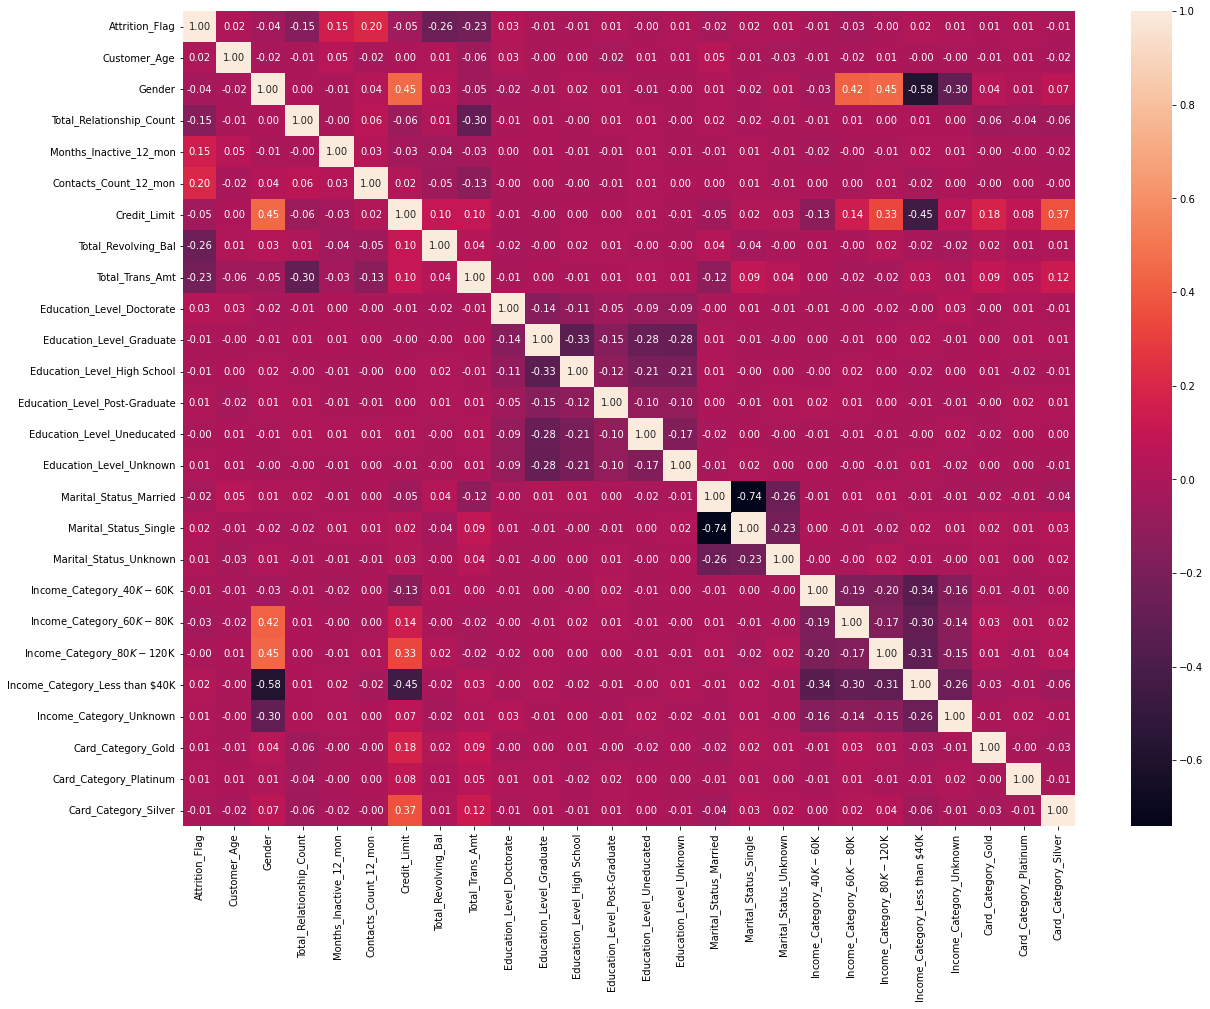

In [54]:
correlation = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True, fmt='.2f')

In [55]:
# drop redundant features
X_train = X_train.drop(columns=['Income_Category_Less than $40K'])
X_test = X_test.drop(columns=['Income_Category_Less than $40K'])

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,feature,vif_score
1,Customer_Age,1.014012
2,Gender,2.348720
3,Total_Relationship_Count,1.102094
4,Months_Inactive_12_mon,1.007978
5,Contacts_Count_12_mon,1.028979
6,Credit_Limit,1.766849
7,Total_Revolving_Bal,1.027213
8,Total_Trans_Amt,1.167905
9,Education_Level_Doctorate,1.375801
10,Education_Level_Graduate,2.825934


# Random Forest

In [57]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [58]:
from imblearn import under_sampling, over_sampling



In [59]:
sm = over_sampling.SMOTE(sampling_strategy=0.5,random_state=42)

X = df.drop(['Attrition_Flag'],axis = 1)
Y = df['Attrition_Flag']
X_sm, Y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
Y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (10127, 25)
Shape of X after SMOTE: (12750, 25)

Balance of positive and negative classes (%):


0    66.666667
1    33.333333
Name: Attrition_Flag, dtype: float64

In [60]:
Y_sm.value_counts()

0    8500
1    4250
Name: Attrition_Flag, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.25, random_state=42)

In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [63]:
print('f1 Score',f1_score(y_test, preds))

f1 Score 0.8909626719056976


## Hypertunning Random Forest


In [64]:
rf_clf = RandomForestClassifier(random_state=42)

In [65]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 17.3 s, sys: 106 ms, total: 17.4 s
Wall time: 17.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [66]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.701219,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.697172,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.686235,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.685608,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.682804,5
15,"{'max_depth': 4, 'n_estimators': 10}",0.640028,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.634719,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.626293,8
19,"{'max_depth': 4, 'n_estimators': 50}",0.611313,9
18,"{'max_depth': 4, 'n_estimators': 40}",0.611311,10


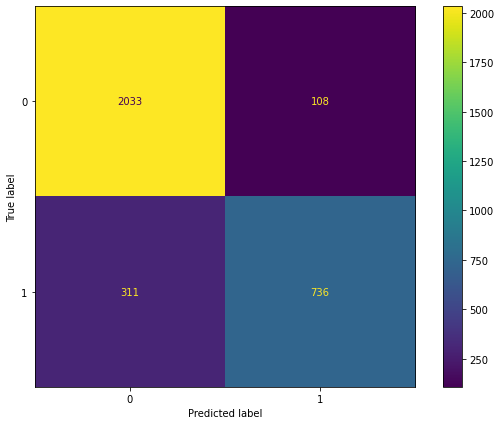

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
                            
disp.plot(ax=ax)
plt.show()

In [68]:
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2141
           1       0.87      0.70      0.78      1047

    accuracy                           0.87      3188
   macro avg       0.87      0.83      0.84      3188
weighted avg       0.87      0.87      0.86      3188



#KKN MODELING

In [69]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                Y,
                                                test_size = 0.3,
                                                random_state = 42)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

list_acc = []
for i in range(1,20):
    print()

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
    list_acc.append(accuracy_score(y_test, y_pred_knn))

In [71]:
y_pred_knn = knn.predict(X_test)

In [72]:
print('F1 Score KNN',f1_score(y_test, y_pred_knn))

F1 Score KNN 0.4302325581395349


## Hypertuning KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [74]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [75]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.230806,7
1,{'n_neighbors': 3},0.368730,1
2,{'n_neighbors': 4},0.251129,6
3,{'n_neighbors': 5},0.351004,2
4,{'n_neighbors': 6},0.267015,5
5,{'n_neighbors': 7},0.341297,3
6,{'n_neighbors': 8},0.271455,4


In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [77]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.404982,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.372270,2
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.368730,3
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.366079,4
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.355433,5
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.354540,6
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.351004,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.341297,8
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.341297,9
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.334213,10


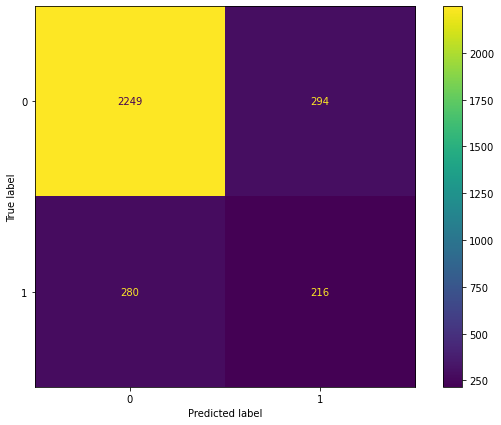

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
                            
disp.plot(ax=ax)
plt.show()

In [79]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2543
           1       0.42      0.44      0.43       496

    accuracy                           0.81      3039
   macro avg       0.66      0.66      0.66      3039
weighted avg       0.81      0.81      0.81      3039



**After looking f1 score, precision, and accuracy between Random Forest and KNN, Random Forest give better results than knn**

# Random Forest Feature Importance

In [80]:
rf_clf_gridcv.best_estimator_.feature_importances_

array([1.25503681e-02, 1.53104591e-02, 1.38773653e-01, 5.55107824e-02,
       2.55843550e-02, 2.28703368e-02, 3.07997498e-01, 3.69848346e-01,
       0.00000000e+00, 1.00496757e-02, 8.47449167e-03, 3.46575373e-04,
       2.57217714e-03, 4.19195419e-04, 9.45527149e-03, 6.53595817e-03,
       5.96472503e-05, 1.68297618e-03, 1.23391946e-03, 7.21758367e-03,
       1.81265523e-03, 0.00000000e+00, 5.19668870e-04, 0.00000000e+00,
       1.17440582e-03])

In [81]:
feature = pd.Series(rf_clf_gridcv.best_estimator_.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Amt                   0.369848
Total_Revolving_Bal               0.307997
Total_Relationship_Count          0.138774
Months_Inactive_12_mon            0.055511
Contacts_Count_12_mon             0.025584
Credit_Limit                      0.022870
Gender                            0.015310
Customer_Age                      0.012550
Education_Level_Graduate          0.010050
Marital_Status_Married            0.009455
Education_Level_High School       0.008474
Income_Category_$80K - $120K      0.007218
Marital_Status_Single             0.006536
Education_Level_Uneducated        0.002572
Income_Category_Less than $40K    0.001813
Income_Category_$40K - $60K       0.001683
Income_Category_$60K - $80K       0.001234
Card_Category_Silver              0.001174
Card_Category_Gold                0.000520
Education_Level_Unknown           0.000419
Education_Level_Post-Graduate     0.000347
Marital_Status_Unknown            0.000060
Education_Level_Doctorate         0.000000
Income_Cate

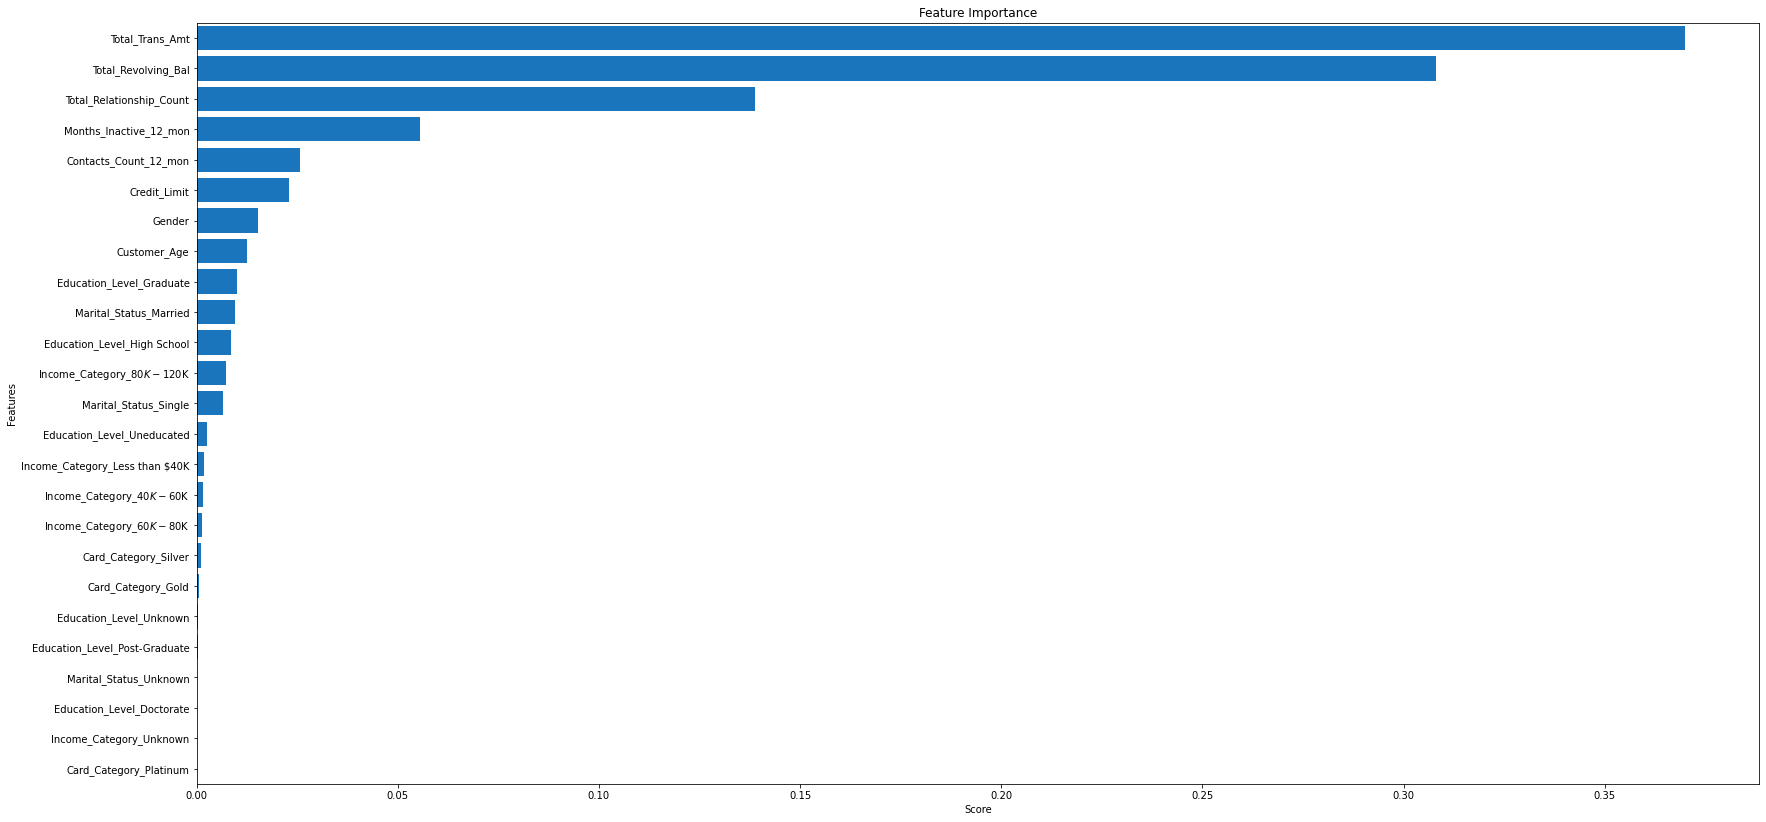

In [82]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

**Interpretation :**

**There are three important feature in predicting the target variable customer churn. `Total_Trans_Amount`, `Total_Revolving_Balance`, `Total_Relantionship_Count`**

# Recommendation for Churned Customer


according feature importance, 


---




**Total_Trans_Amount**
*   if `Total_Trans_Amount` is larger, this will increase the bill and interest on credit card payments (if the customer cannot pay on time) this can result in the customer running away from his responsibilty, although there are risks if the customer does not fulfill his responsibilty such as a blacklist. The thing that can be done by the bank is to provide a credit card payment relief program if the customer has entered the fail to pay category, so this will benefit both parties.
*   Banks can provide credit card promos if customers make large transactions, such as cash back, discount, earn points to be exchanged for hotel stays or flights or changing customer category to privilage or priority customer if they have big amount.

---

**Total_Revolving_Balance**


*   Revolving balance is called by If you don’t pay the balance on your revolving credit account in full every month, the unpaid portion carries over to the next month. To prevent swelling of revolving credit card balances for customers which will later have an impact on customers leaving is to improve the system on Know Your Customer investigations, Conducting due diligence, Setting accurate credit limits and Using a reputable credit reference agency for more in-depth due diligence can give you invaluable insight and alert you to any potential red flags.

---
**Total_Relantionship_Count**


*   change or add credit card products according to customer needs, such as if the customer is married, the bank provides health or education insurance benefits according to the credit card limit given or the number of transactions made. or for people who like to travel, banks can make special credit cards for people who have a hobby of traveling with the benefit of collecting points from each traveling transaction. points that have been collected can be exchanged for hotel accommodation or airline tickets. so that if customers have credit cards according to their respective profiles this can reduce the customer churn rate





